# Simulate network of MEMS oscillator

## Import modules

In [1]:
%matplotlib notebook
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import cmath
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import ipywidgets as widgets
from sklearn import datasets
from ipywidgets import interact,Textarea

In [2]:
from MEMS_oscillator import phase_convert,symmetrize
from MEMS_oscillator import oscillator_solver,simulate_network
from MEMS_oscillator import DOM_under_different_initial_conditions_3,DOM_under_different_initial_conditions_2
from MEMS_oscillator import pixel_convolution

image_size = 3

## Simulate a oscillator network with random initial phase and random coupling weights

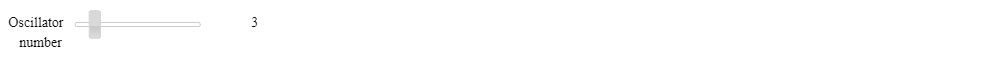

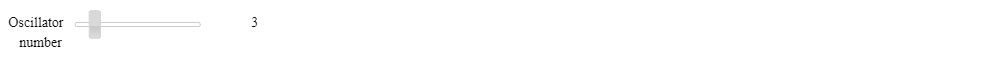

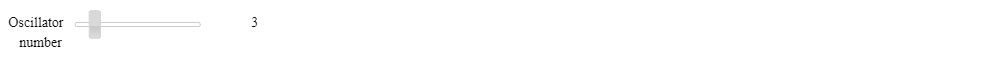

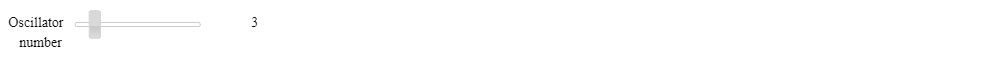

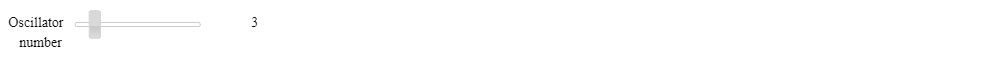

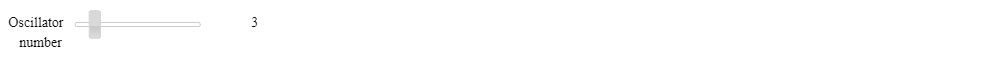

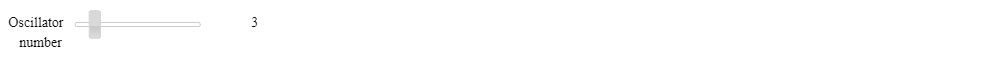

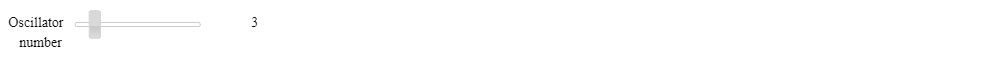

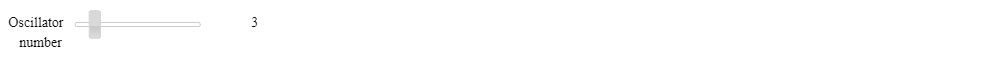

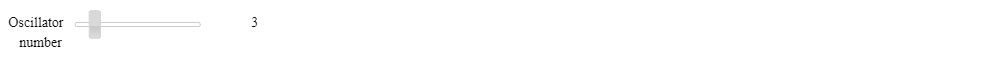

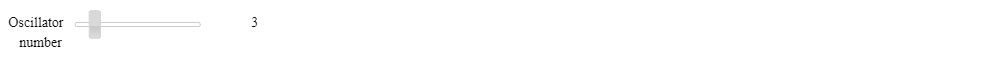

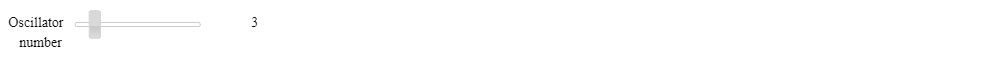

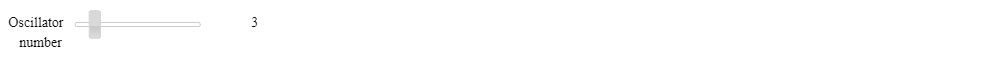

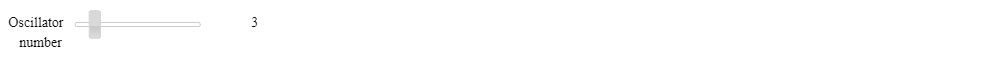

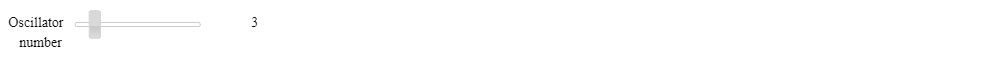

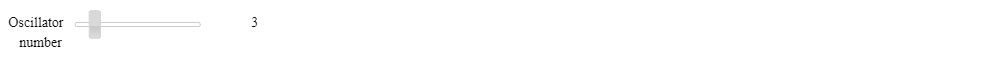

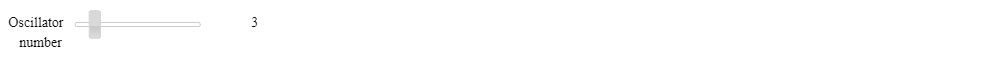

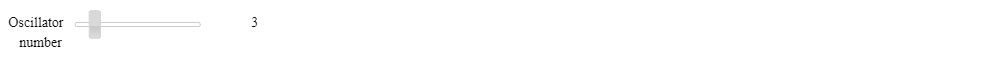

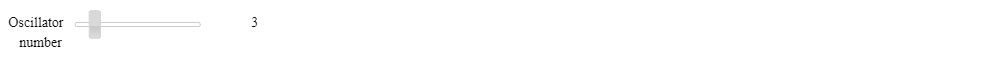

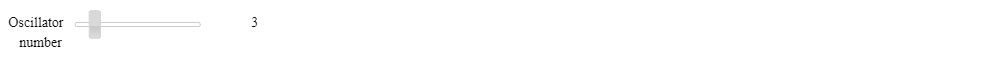

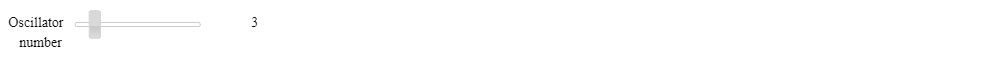

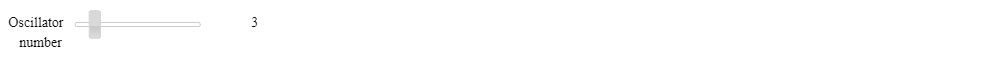

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [3]:
osn = widgets.IntSlider(
    value=2,
    min=2,
    max=10,
    step=1,
    description='Oscillator number',
)
osn

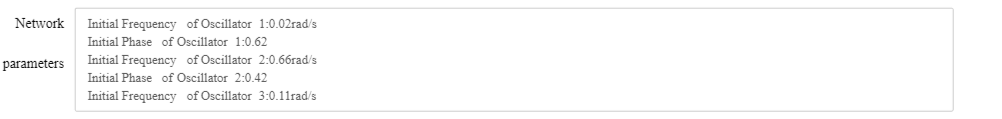

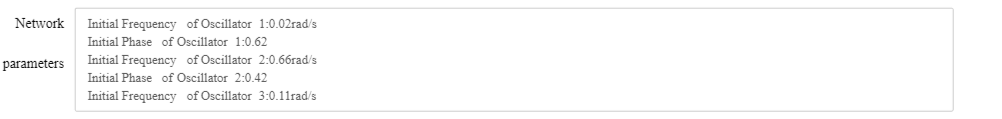

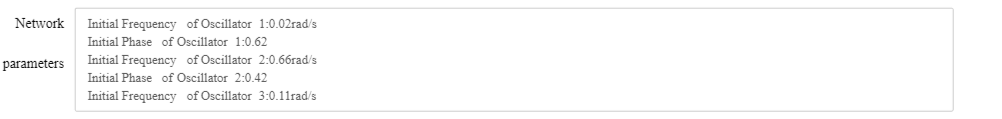

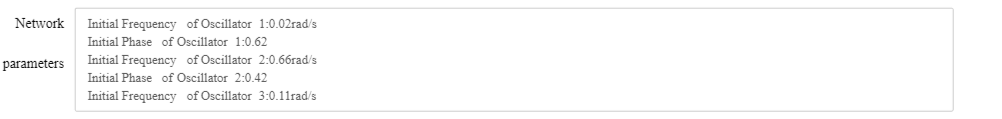

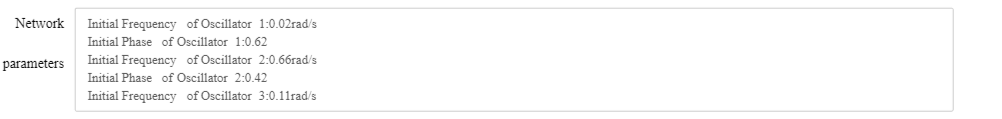

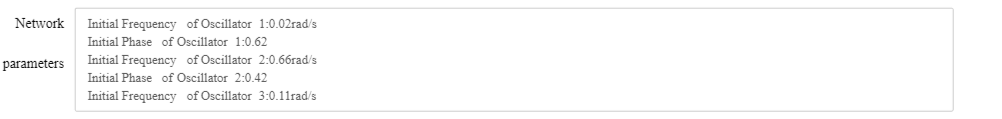

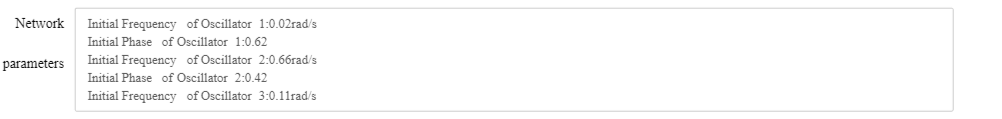

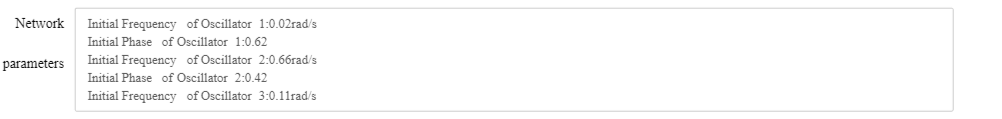

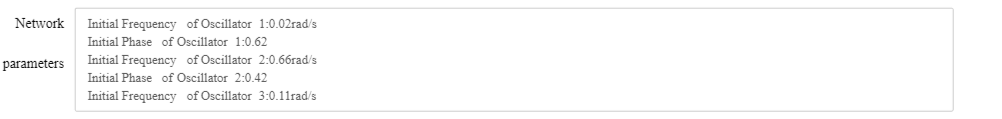

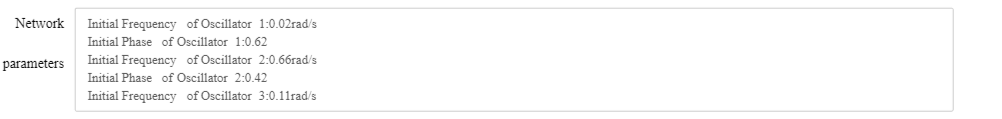

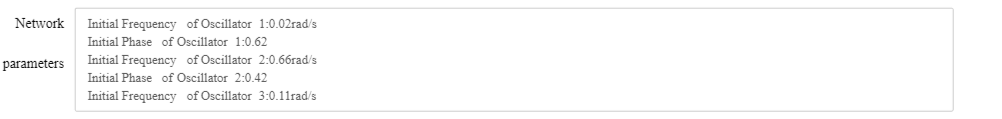

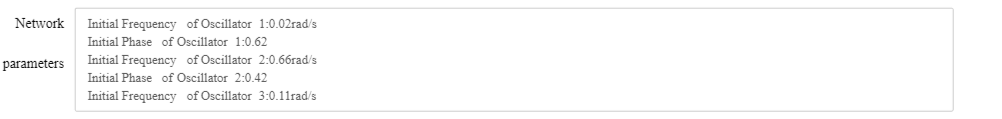

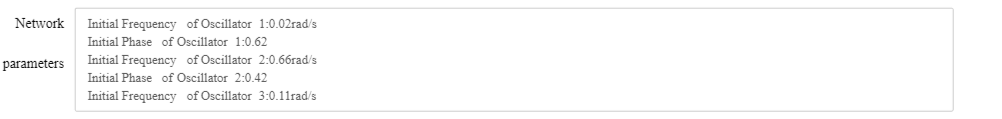

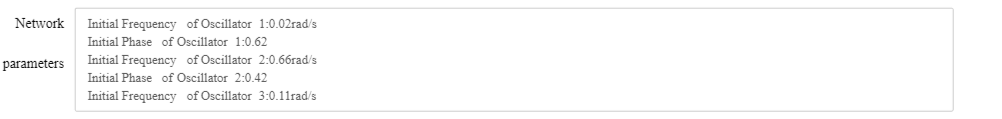

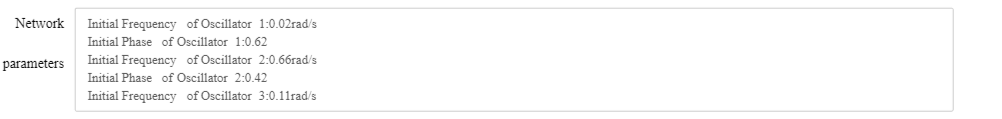

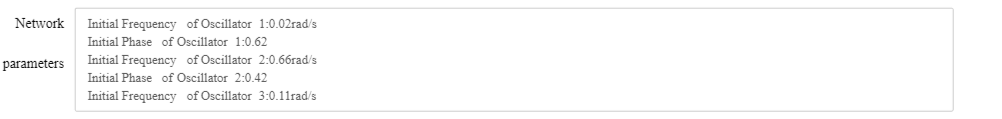

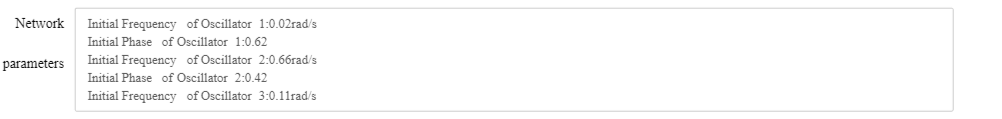

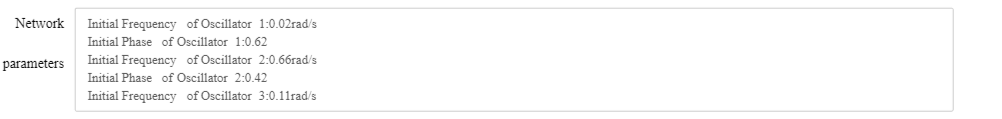

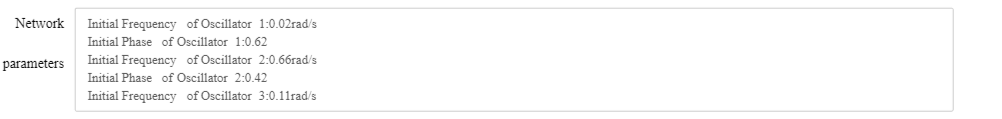

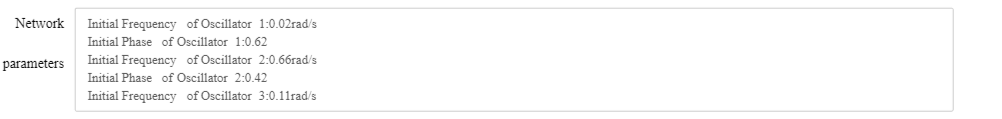

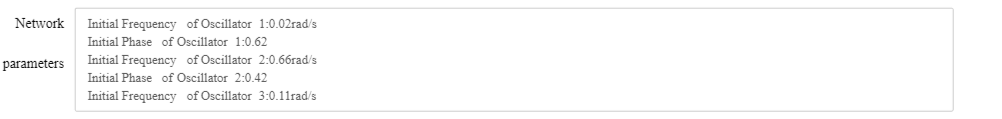

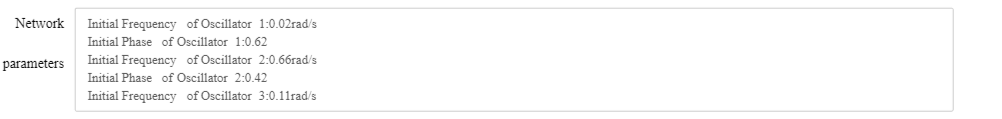

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [4]:
Simulation_parameters = Textarea(
    description='Network parameters',
    width='95%',
    #height='300px'
)

Simulation_parameters

<IPython.core.display.Javascript object>


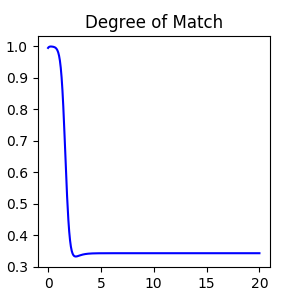

In [29]:
plt.figure('Degree of Match',figsize = (image_size,image_size))
plt.clf()

<IPython.core.display.Javascript object>


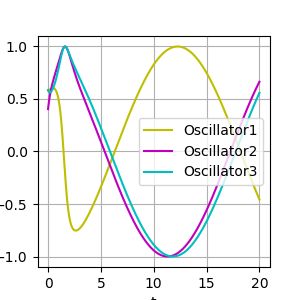

In [30]:
plt.figure('Oscillation state',figsize = (image_size,image_size))
plt.clf()

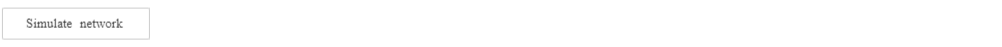

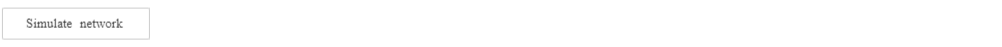

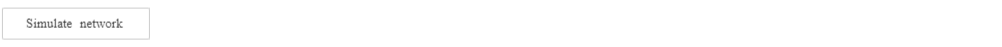

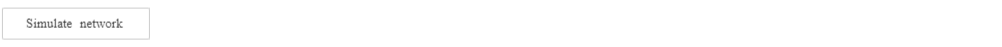

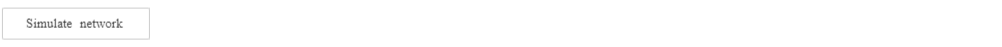

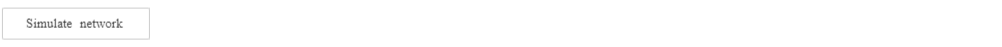

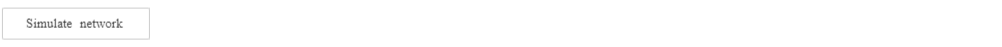

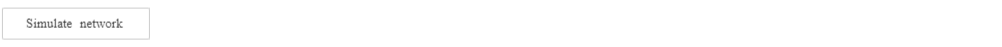

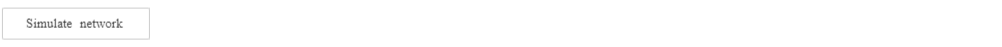

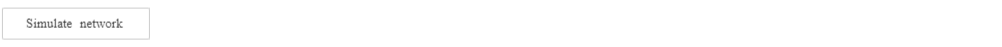

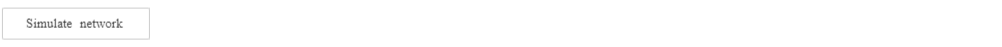

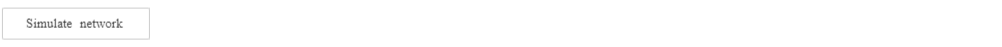

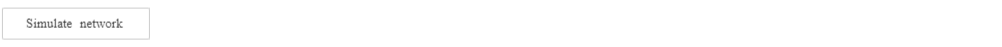

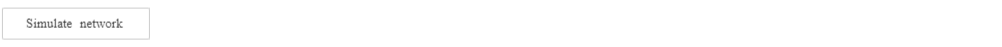

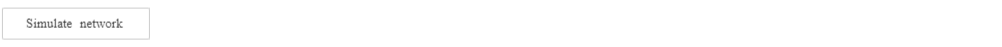

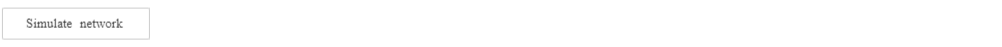

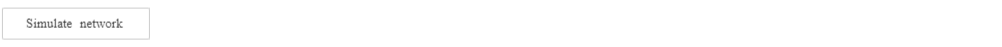

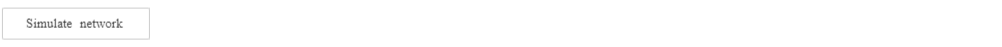

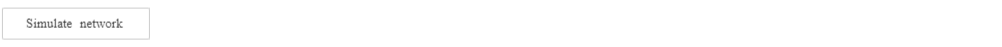

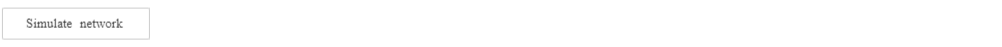

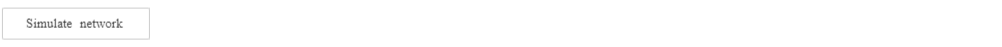

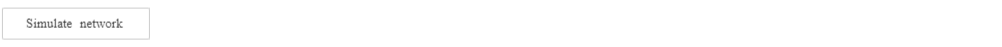

Coupling strength
[[ 0.   -0.43 -1.12]
 [-0.43  0.    2.17]
 [-1.12  2.17  0.  ]]


In [34]:
BTN_simulate_solver = widgets.Button(description="Simulate network")
display(BTN_simulate_solver)

def on_BTN_simulate_solver_clicked(b):
    plt.figure('Degree of Match',figsize = (image_size,image_size))
    plt.clf()
    plt.figure('Oscillation state',figsize = (image_size,image_size))
    plt.clf()
    text = simulate_network(osn.value)
    Simulation_parameters.value = text
    
BTN_simulate_solver.on_click(on_BTN_simulate_solver_clicked)

## Simulate Degree of Match of a 3-oscillator network with various initial frequency

The Degree of Match is defined as the average value of DoM function between 24s and 30s.

This is relatively a long time because the maximum frequency for this simulation is set to 0.05 rad/s for oscillators.

When x_3 is 0, the regression model is $DoM = 0.994977-73.6202x_1^2+0.000116x_1-73.6202x_2^2+0.000116x_2 + 71.49526x_1x_2$.

Otherwise, replace $x_1$ and $x_2$ with $x_1-x_3$ and $x_2-x_3$

* $x_i$ represents the initial frequency of the oscillator i



<img  src="3osc.PNG"/>

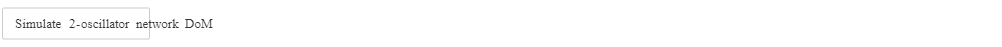

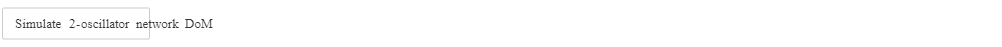

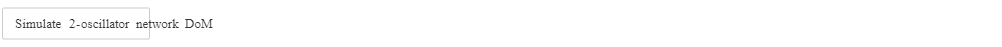

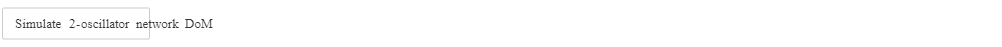

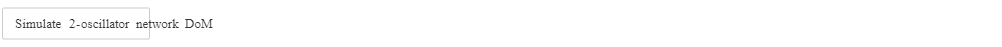

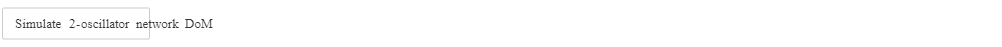

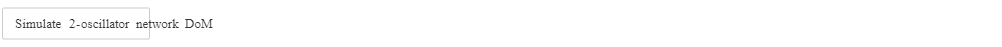

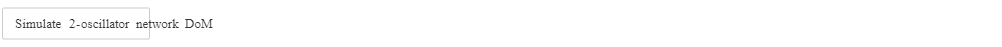

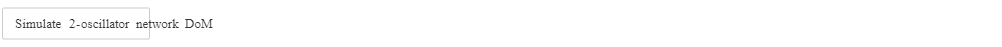

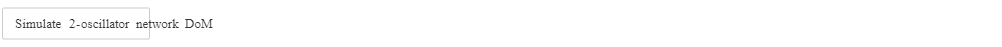

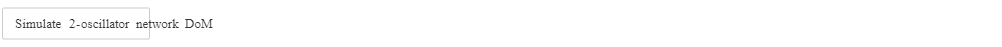

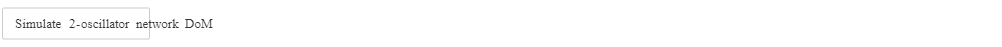

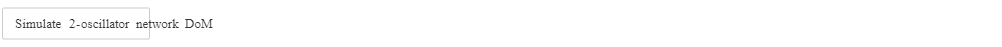

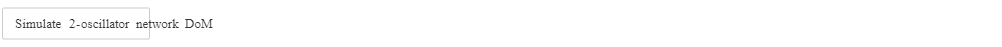

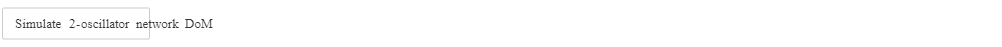

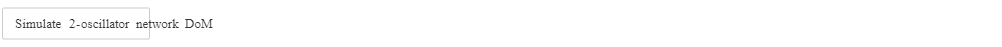

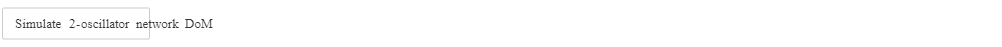

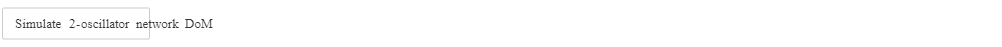

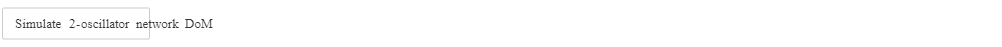

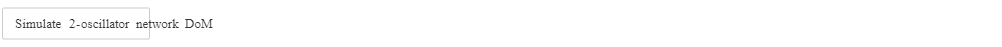

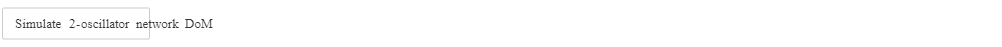

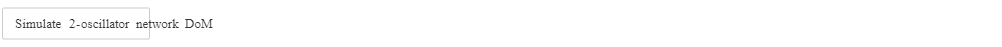

<IPython.core.display.Javascript object>


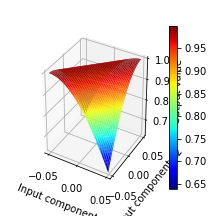

Finish 0%
Finish 20%
Finish 40%
Finish 60%
Finish 80%


In [49]:
BTN_2_osc = widgets.Button(description="Simulate 2-oscillator network DoM")
display(BTN_2_osc)
%matplotlib notebook
plt.figure('2-Oscillator',figsize = (image_size,image_size))
plt.clf()

def on_BTN_2_osc_clicked(b):
    plt.figure('2-Oscillator',figsize = (image_size,image_size))
    plt.clf()
    DOM_under_different_initial_conditions_2()
    
BTN_2_osc.on_click(on_BTN_2_osc_clicked)

## Simulate Degree of Match of a 2-oscillator network with various initial frequency

The Degree of Match is defined as the average value of DoM function between 24s and 30s.

This is relatively a long time because the maximum frequency for this simulation is set to 0.05 rad/s for oscillators.

The regression model is $DoM = 0.993018255-81.64674939x_1^2+0.001515155x_1-81.64674939x_2^2+0.001515155x_2 + 166.3238084x_1x_2$.


<img  src="osc2.PNG"/>

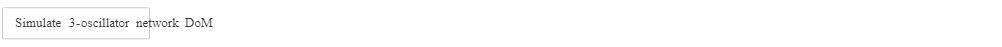

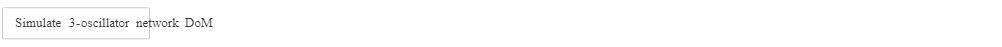

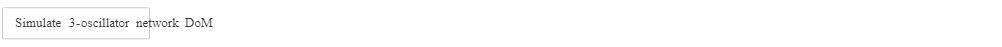

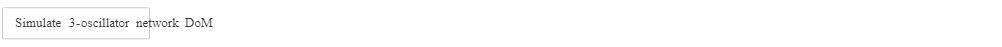

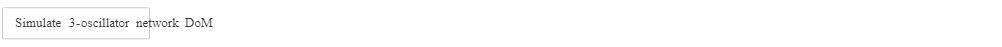

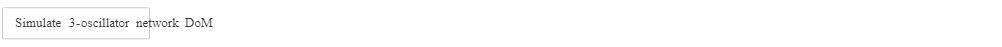

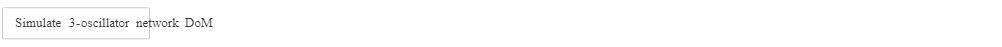

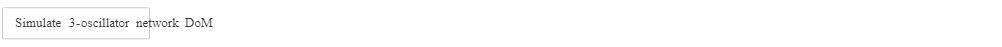

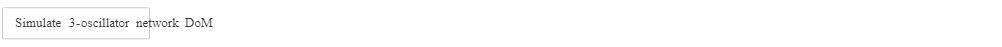

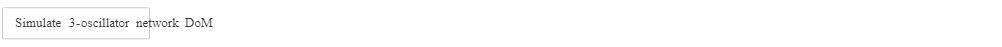

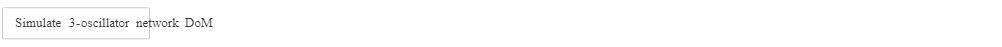

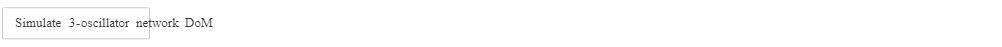

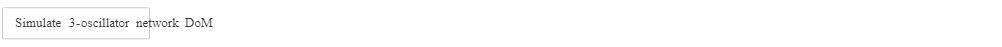

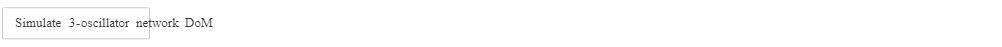

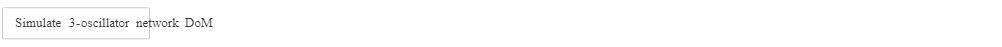

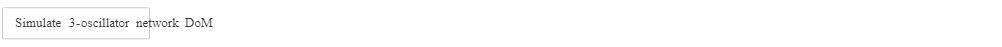

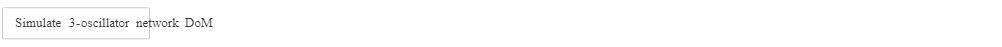

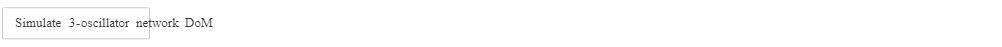

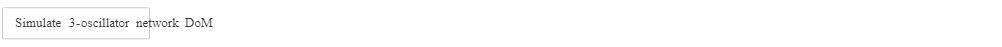

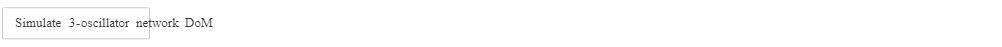

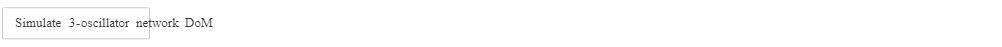

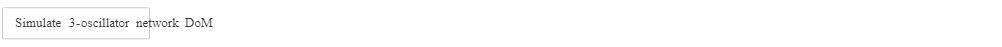

<IPython.core.display.Javascript object>


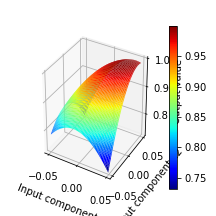

Finish 0%
Finish 20%
Finish 40%
Finish 60%
Finish 80%


In [50]:
BTN_3_osc = widgets.Button(description="Simulate 3-oscillator network DoM")
display(BTN_3_osc)

plt.figure('3-Oscillator',figsize = (image_size,image_size))
plt.clf()

def on_BTN_3_osc_clicked(b):
    plt.figure('3-Oscillator',figsize = (image_size,image_size))
    plt.clf()
    DOM_under_different_initial_conditions_3(shift = 0.03)
    
BTN_3_osc.on_click(on_BTN_3_osc_clicked)

***
# Simulate Convolution
* Notice the regression is performed over the range (-0.05,0.05). We need to preprocess the number before convolution.

<IPython.core.display.Javascript object>


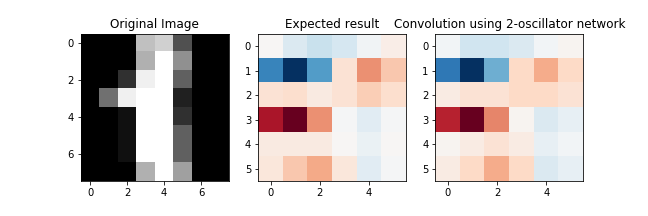

In [51]:
plt.figure('Convolution simulation',figsize=(3*image_size,image_size))
plt.clf()

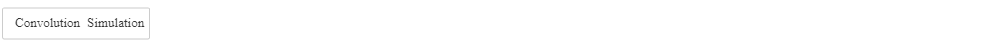

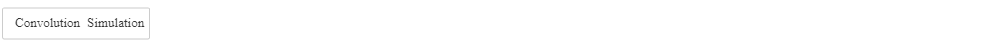

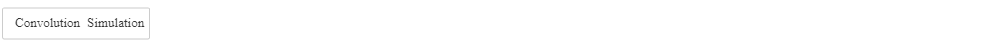

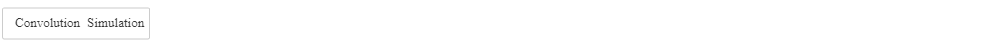

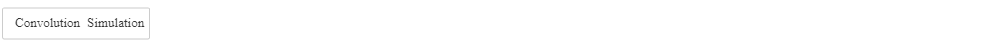

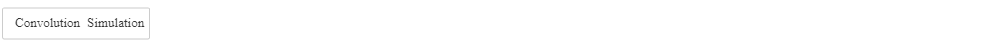

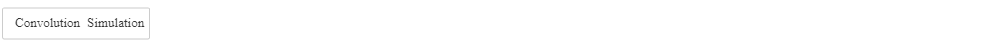

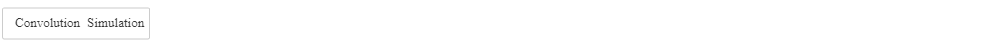

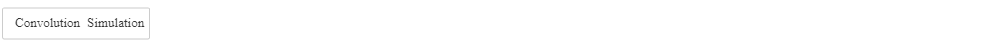

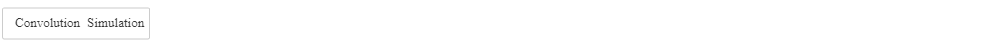

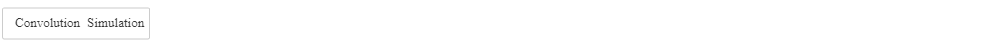

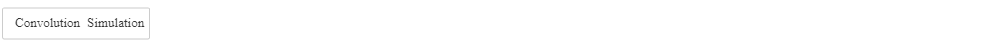

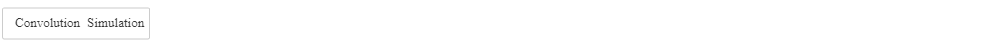

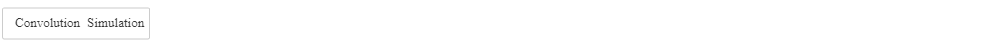

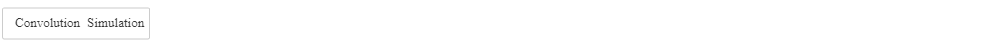

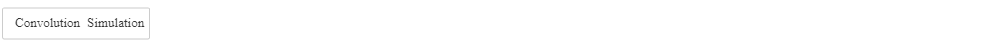

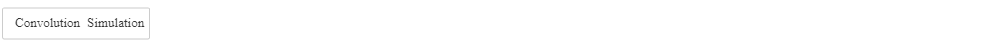

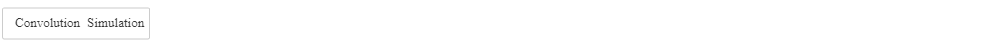

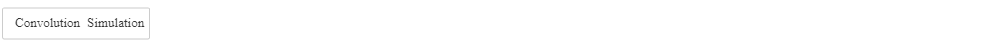

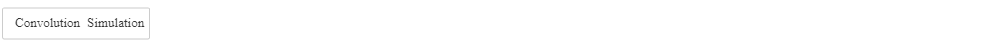

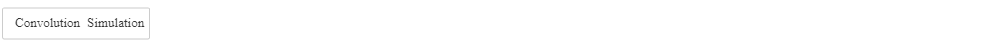

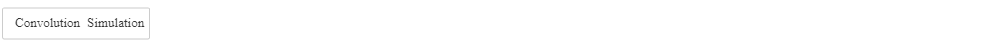

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [11]:
BTN_conv = widgets.Button(description="Convolution Simulation")
display(BTN_conv)


def on_BTN_conv_clicked(b):
    plt.rcParams['image.cmap'] = 'gray'
    plt.rcParams['image.interpolation'] = 'none'
    from sklearn import datasets

    digits = datasets.load_digits()

    image = digits.images[1]
    fig = plt.figure('Convolution simulation')
    plt.clf()
    plt.subplot(131)
    plt.imshow(image);
    plt.title('Original Image')

    horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                       [ 0,  0,  0],
                                       [-1, -2, -1]])
    from scipy.ndimage import convolve
    horizontal_edge_response = convolve(image, horizontal_edge_kernel)
    plt.subplot(132)
    plt.imshow(horizontal_edge_response[1:7,1:7], cmap=plt.cm.RdBu);
    plt.title('Expected result')

    maxnum = np.max(image)
    kernel_reduce = horizontal_edge_kernel/40.0
    image_reduce = image/maxnum/20.0
    new = np.zeros((8,8))

    for i in range(7):
        for j in range(7):
            if i ==0 or j == 0:
                pass
            else:
                new[i,j] = pixel_convolution(kernel_reduce[0,0],image_reduce[i-1,j-1])\
                            +pixel_convolution(kernel_reduce[0,1],image_reduce[i-1,j])+\
                            pixel_convolution(kernel_reduce[0,2],image_reduce[i-1,j+1])+\
                            pixel_convolution(kernel_reduce[2,0],image_reduce[i+1,j-1])+\
                            pixel_convolution(kernel_reduce[2,1],image_reduce[i+1,j])+\
                            pixel_convolution(kernel_reduce[2,2],image_reduce[i+1,j+1])
            new[i,j] = int(-new[i,j]*800*maxnum)
    plt.subplot(133)
    plt.imshow(new[1:7,1:7], cmap=plt.cm.RdBu)
    plt.title('Convolution using 2-oscillator network')
    
BTN_conv.on_click(on_BTN_conv_clicked)




***
# Pattern recognition

### Hopfield energy function:

$E = -\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} w_{ij} x_i x_j$

Let's pretend that vector a = (a1,a2) and b = (b1,b2) is stored in the network.

And as you can see in the figure, a and b are located as the local minimum.

In [12]:
from hopfield import bin2sign,hopfield_energy,binarize,format_data
from hopfield import HopfieldNetwork

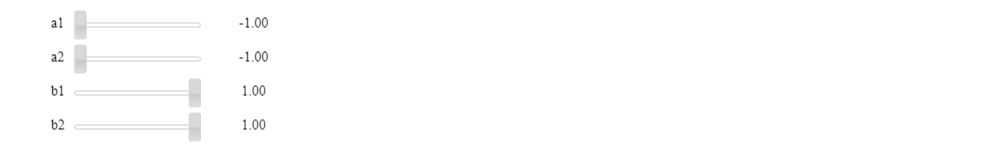

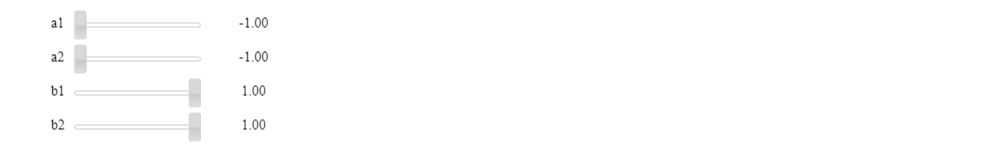

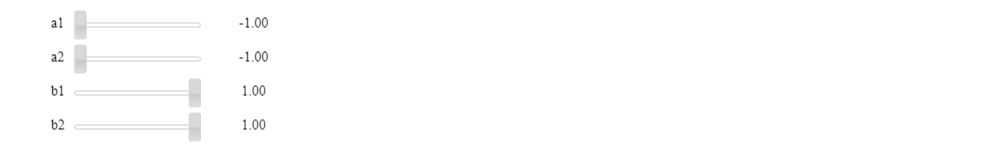

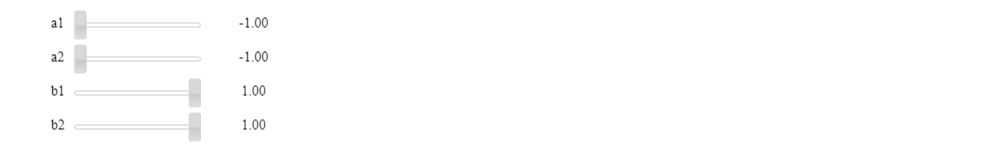

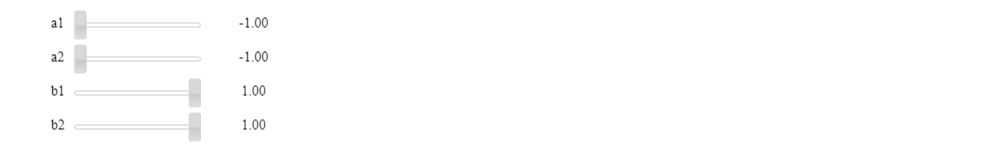

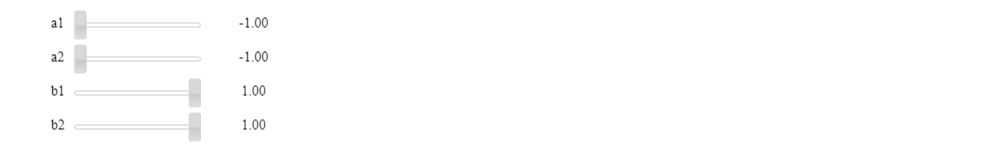

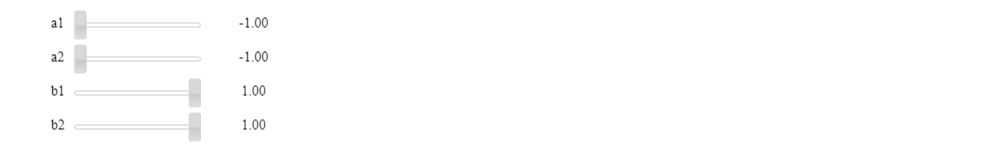

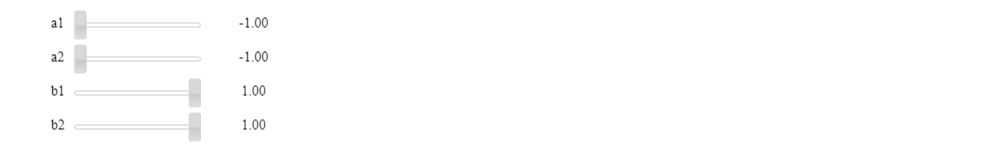

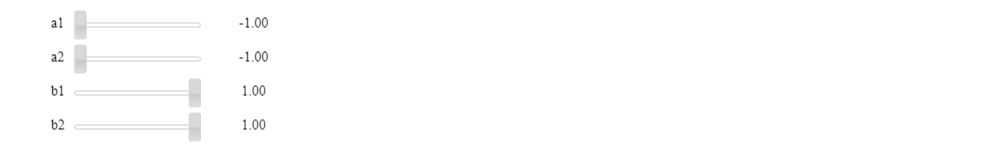

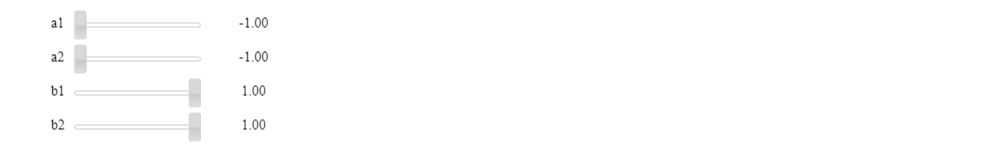

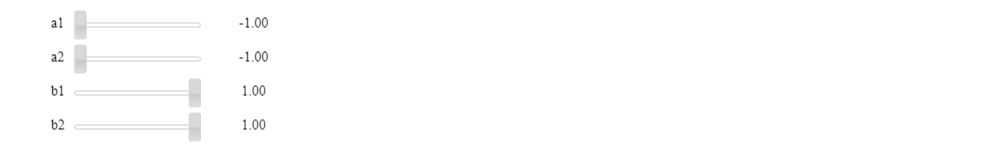

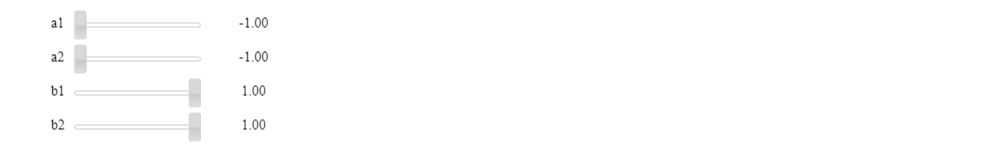

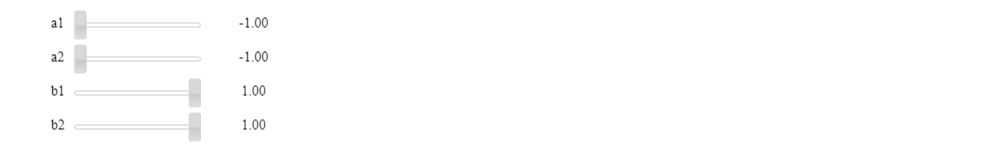

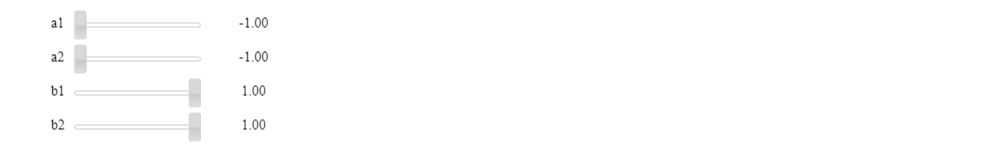

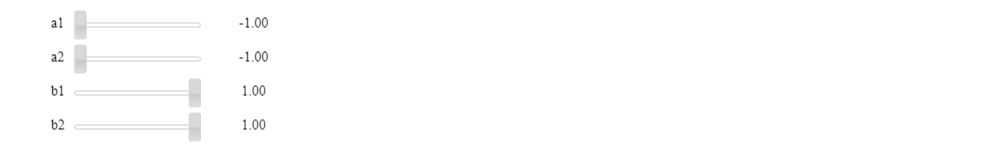

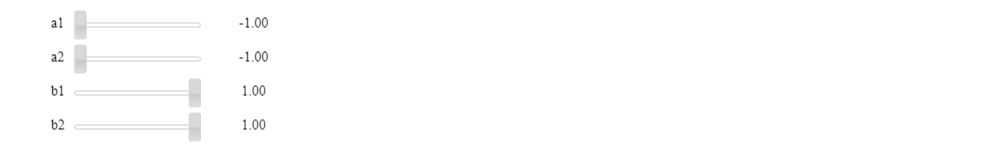

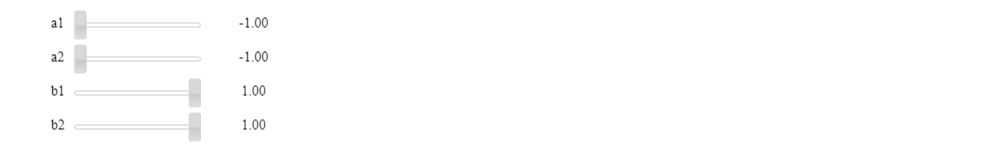

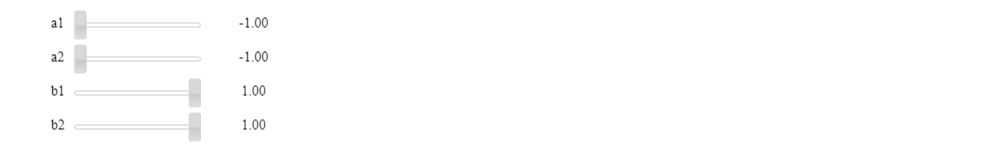

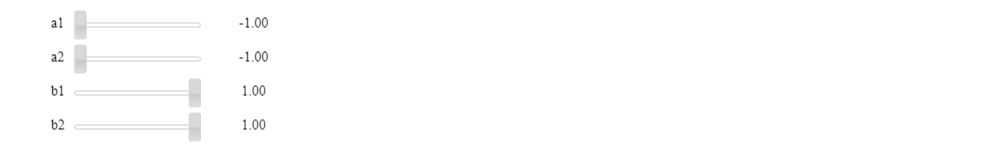

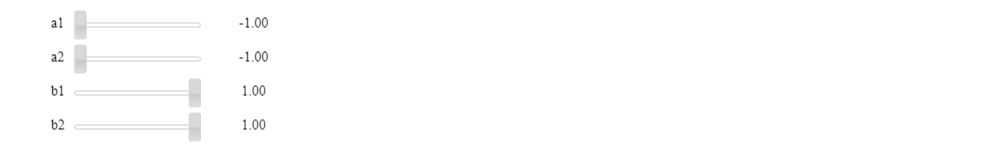

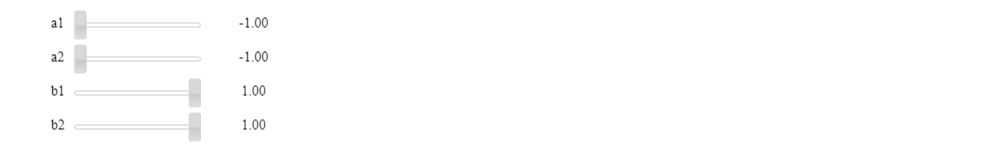

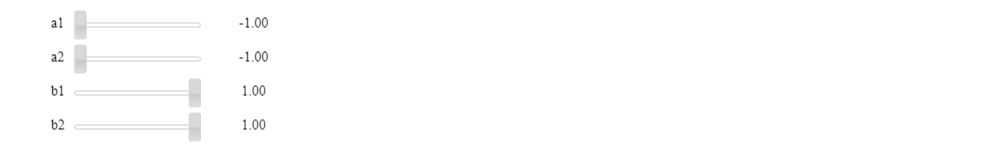

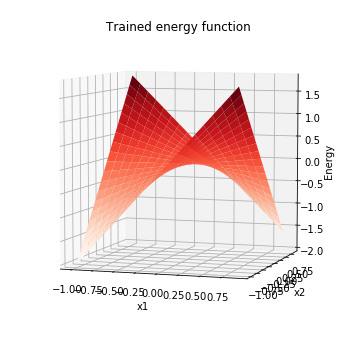

In [52]:
from ipywidgets import interact
%matplotlib inline
@interact(a1=(-1.0,1.0), b1=(-1.0,1.0), a2=(-1.0,1.0),b2=(-1.0,1.0))
def plot_hopfield_energy(a1,a2,b1,b2):    
    def energy(input_vector):
        input_vector = np.array(input_vector)
        X = np.array([[a1, a2], [b1, b2]])
        weight = X.T.dot(X) - 2 * np.eye(2)
        return -0.5 * input_vector.dot(weight).dot(input_vector)
    
    fig = plt.figure('Energy function simulation',figsize=(image_size*2,2*image_size))
    ax = fig.add_subplot(111, projection='3d')

    x = y = np.arange(-1.0, 1.0, 0.1)
    X, Y = np.meshgrid(x, y)
    
    energies = map(energy, zip(np.ravel(X), np.ravel(Y)))
    
    zs = np.array(list(energies))
    Z = zs.reshape(X.shape)

    ax.view_init(elev=6, azim=-72)
    ax.plot_surface(X, Y, Z, cmap='Reds')
    ax.set_title("Trained energy function")
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Energy')

    plt.show()

In [56]:
%matplotlib notebook
from numpy.core.umath_tests import inner1d
import math
from scipy.sparse import issparse

* bin2sign:Convert zeros in banary matrix to -1 values.
* Compute Hopfield energy between input data, output data and neural network weights.
* binarize: Binarize the result of the output.
* format_data: Preprocess the data

### This following is for testing pattern recognition.
* Execute cells one by one!!!

### Initiate variables

In [15]:
digits = datasets.load_digits()
index_lib = sorted([1,2,3,4])
data = []

### 1 Select patterns to remeber(Use Ctrl and shift key to select mutiple patterns)

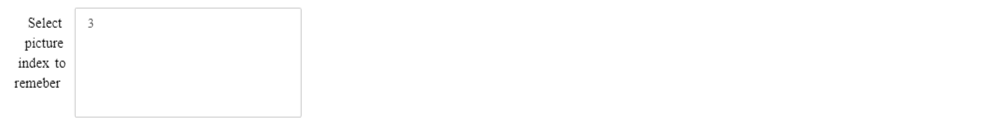

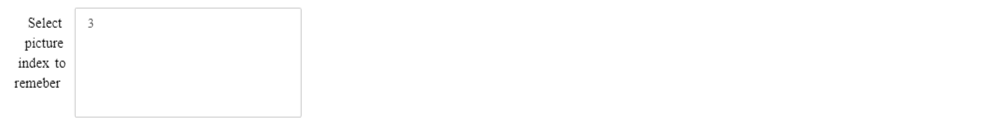

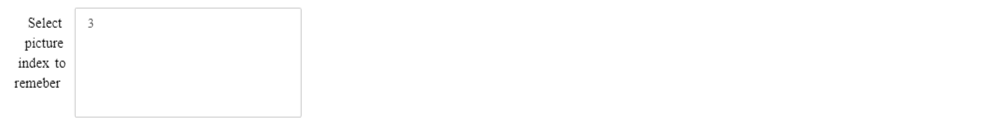

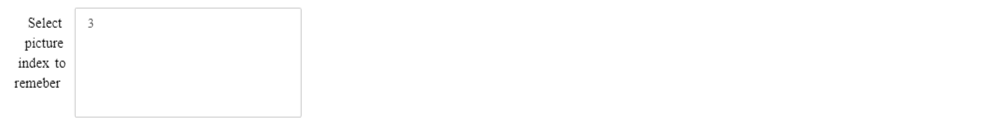

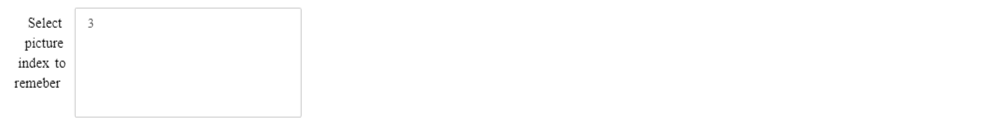

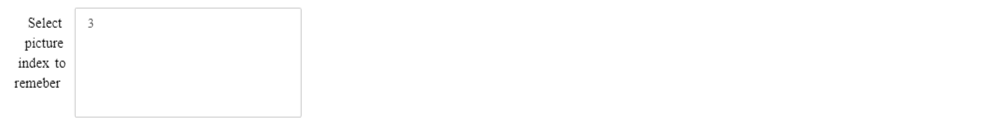

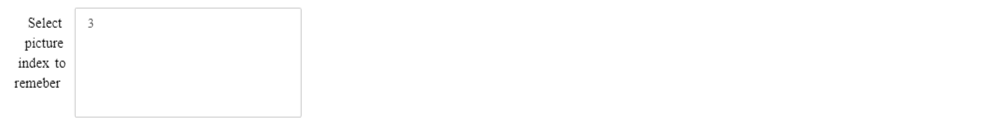

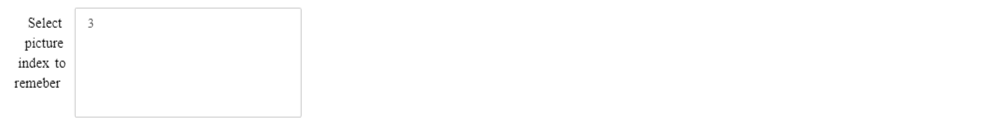

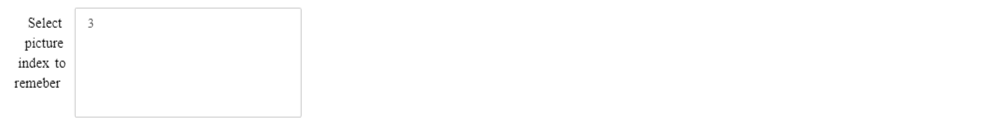

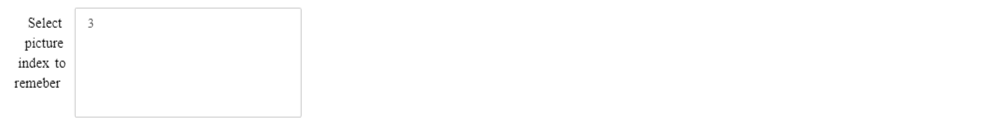

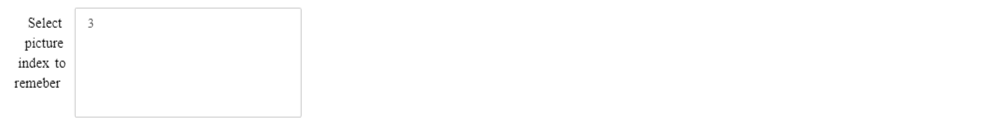

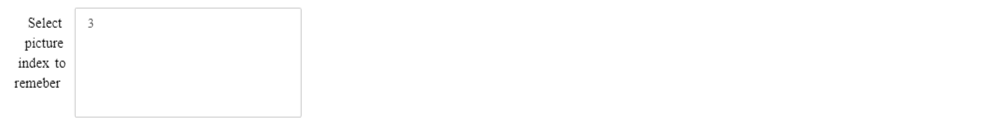

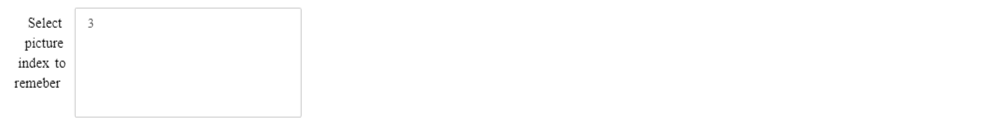

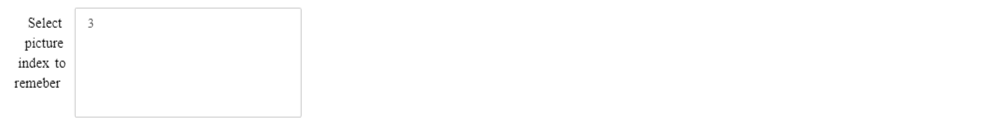

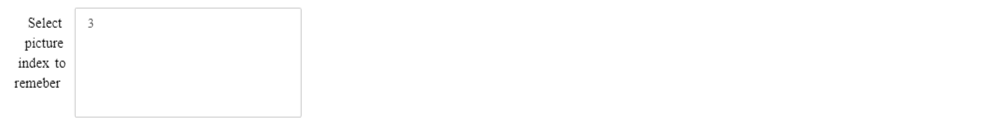

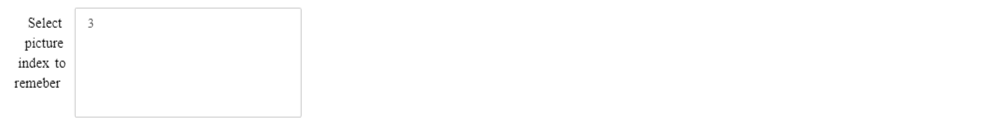

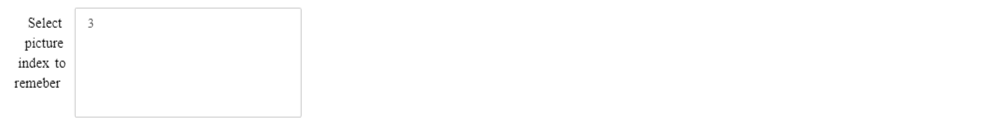

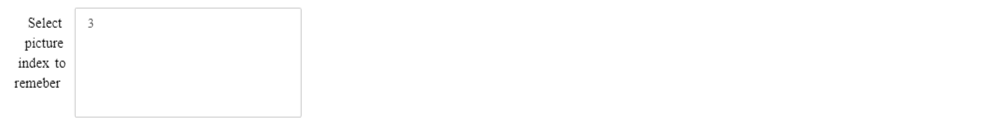

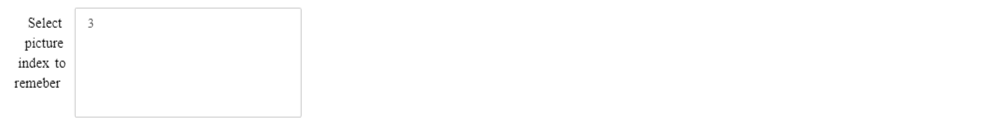

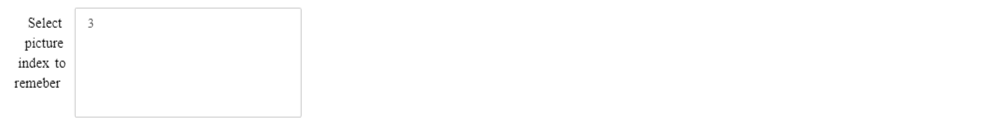

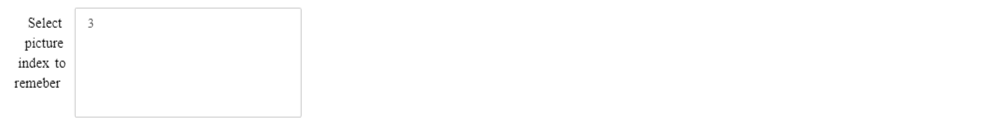

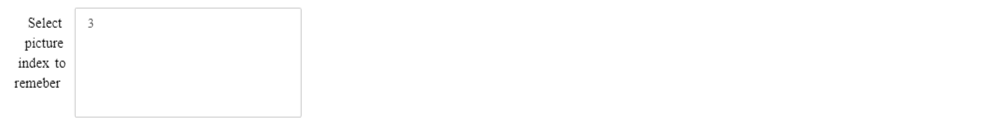

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [16]:
lib = widgets.SelectMultiple(
    description="Select picture index to remeber",
    options=range(1,101)
    
)
display(lib)

### 2 Confirm selected pattern indexes (execute the cell and click the button)

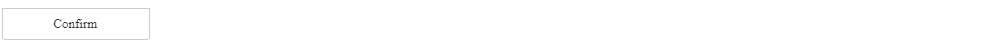

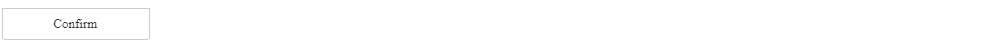

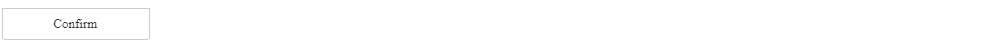

You have selected index:
[2, 3, 4]
You have selected index:
[3, 4]


In [74]:
BTN_confirm = widgets.Button(description="Confirm")
display(BTN_confirm)


def on_BTN_confirm_clicked(b):
    global index_lib
    global data
    index_lib = list(lib.value)
    print "You have selected index:"
    print index_lib
    data = binarize(digits.images[lib.value,:])
    #print digits.images[lib.value,:]
    data = data.reshape(len(data),-1)
    
BTN_confirm.on_click(on_BTN_confirm_clicked)


### 3 Preview patterns to be remembered

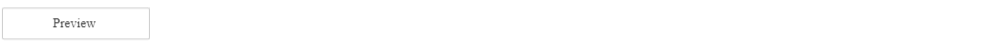

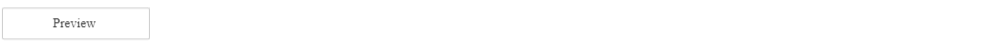

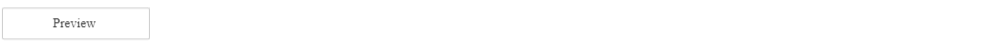

<IPython.core.display.Javascript object>


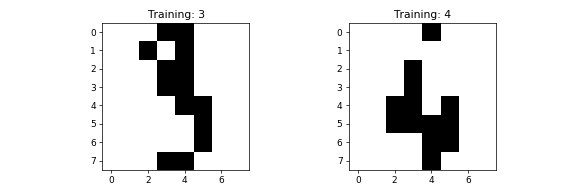

In [75]:
def view_image(i):
    plt.imshow(binarize(digits.images[int(i)]),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %s' % digits.target[i])
    plt.draw()

    
BTN_preview = widgets.Button(description="Preview")
display(BTN_preview)

plt.figure('Preview',figsize=(3*image_size,image_size))
plt.clf()

def on_BTN_preview_clicked(b):
    count = 1
    plt.figure('Preview')
    plt.clf()
    for i in index_lib:
        plt.subplot(1, len(index_lib,),count)
        count = count+1
        view_image(i)  
    index.options = index_lib
    
BTN_preview.on_click(on_BTN_preview_clicked)       

### 5 Select image to modify before reconstructing

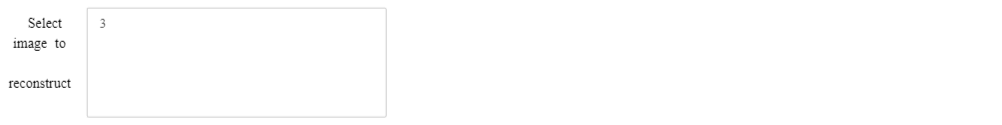

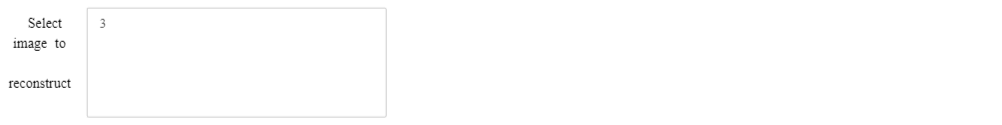

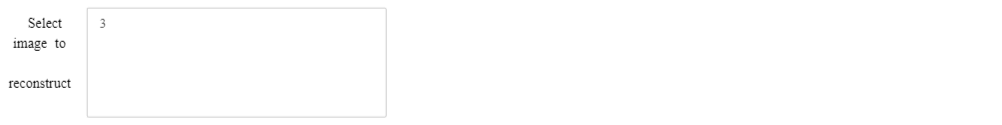

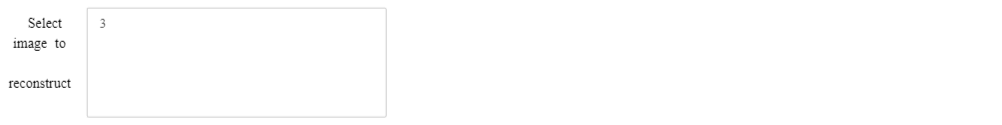

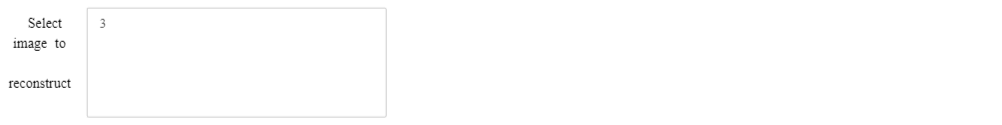

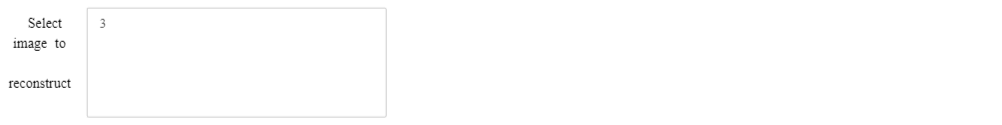

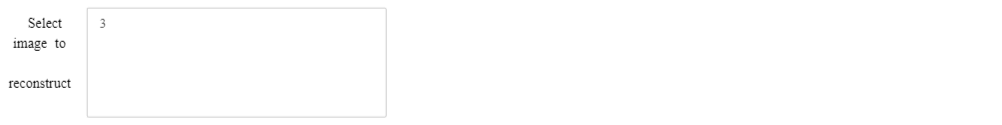

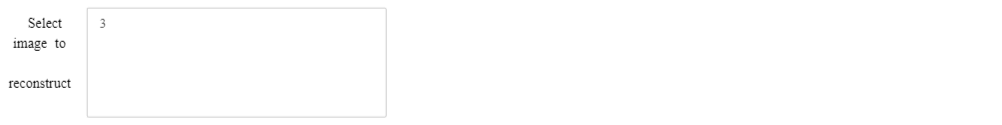

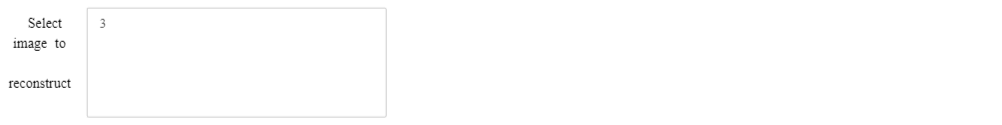

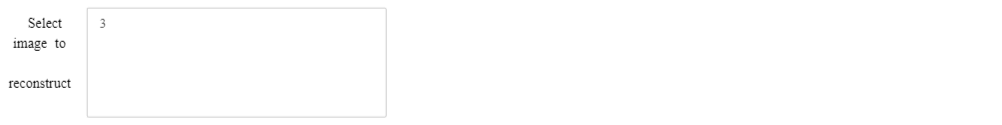

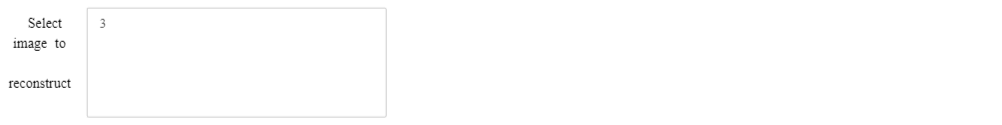

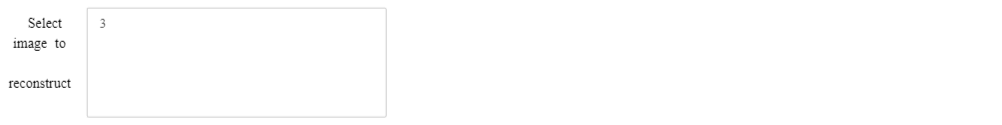

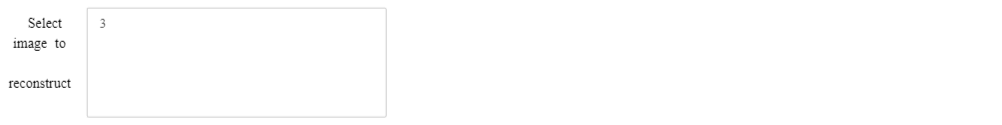

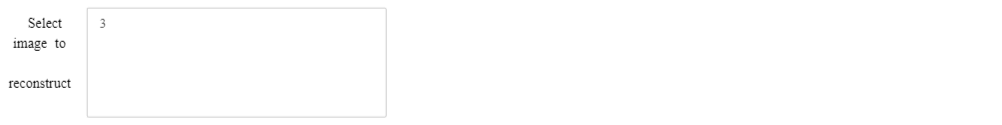

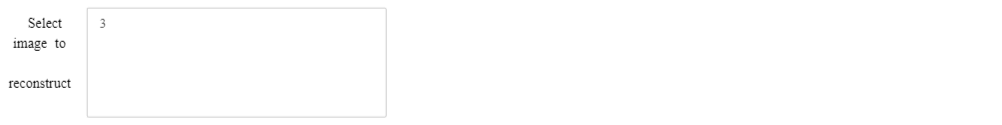

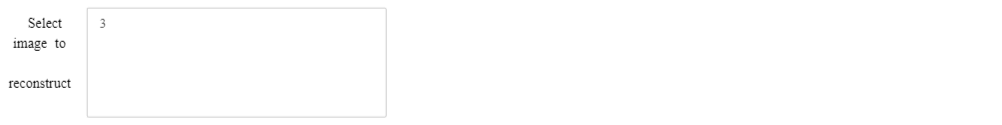

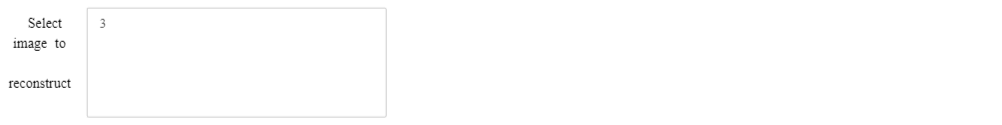

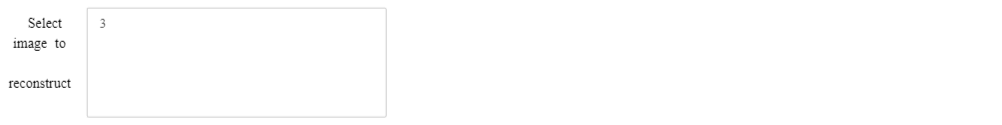

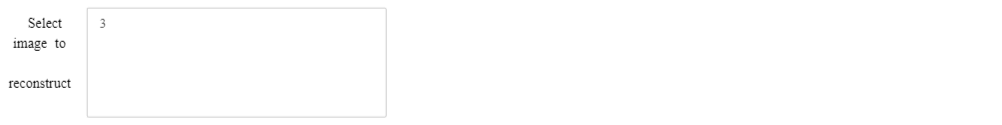

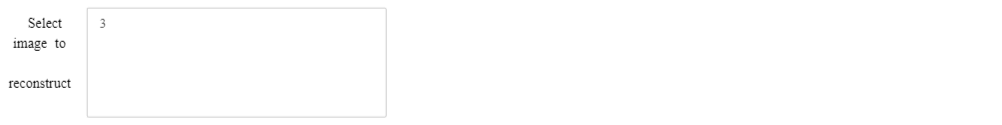

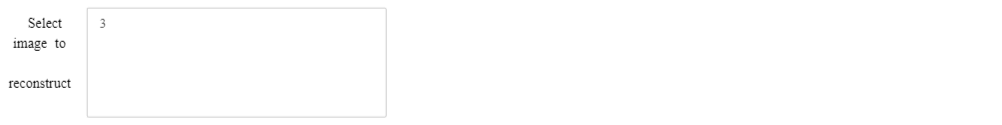

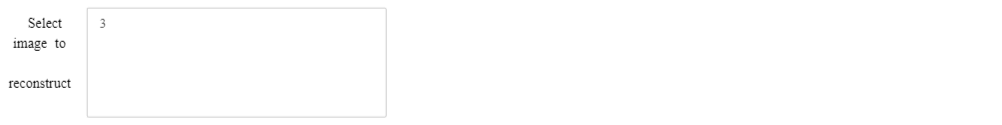

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [19]:
index = widgets.Select(
    description='Select image to reconstruct',
    options=index_lib,
    value=index_lib[0]
)
index

In [20]:
from image_process import addnoise, half

### 6 Select the noise percent to add

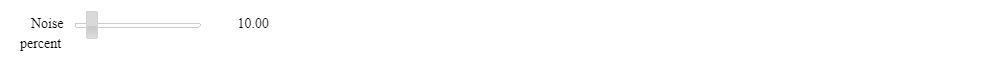

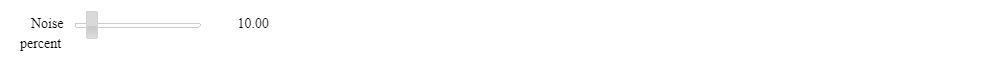

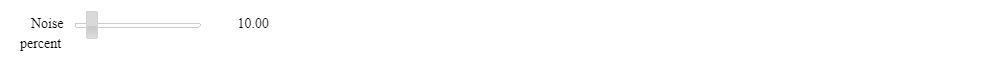

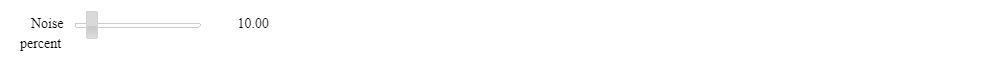

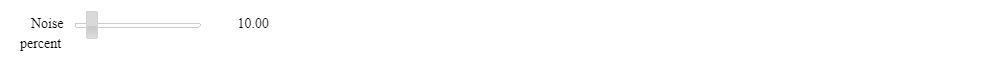

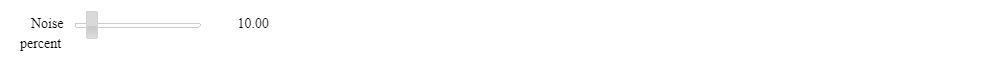

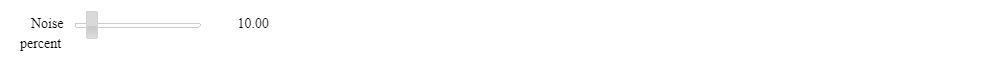

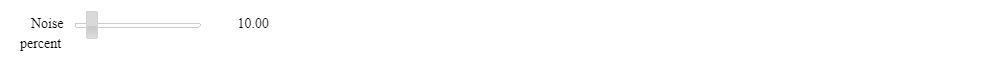

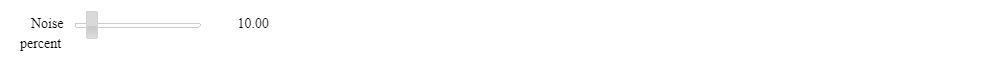

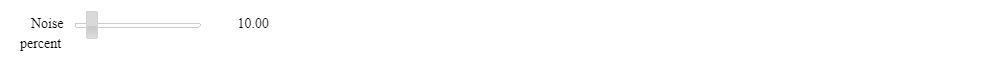

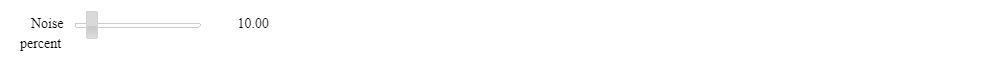

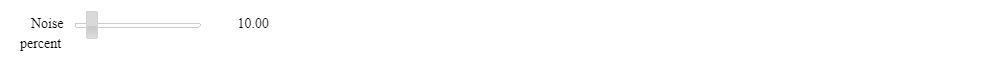

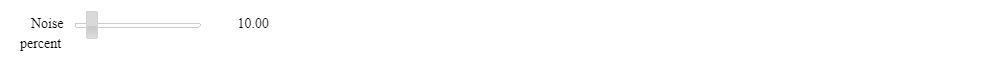

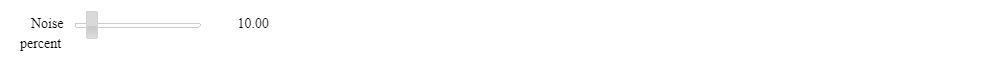

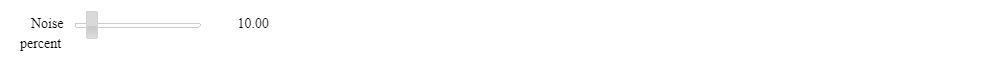

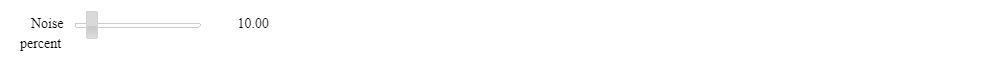

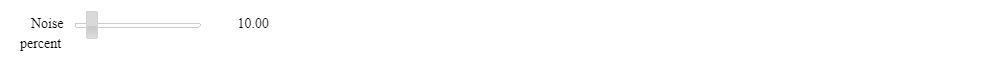

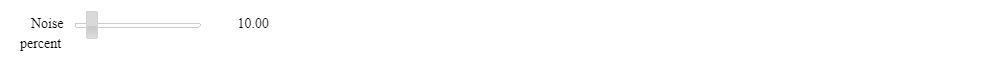

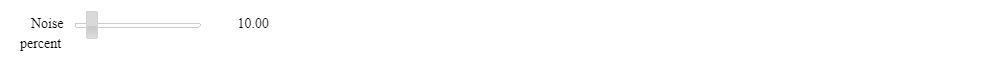

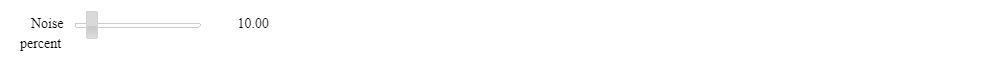

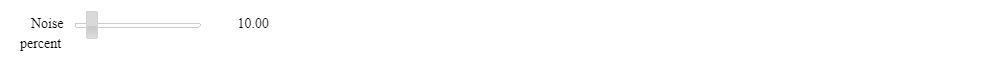

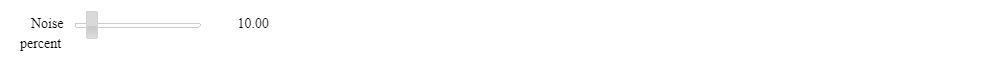

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [21]:
percent = widgets.FloatSlider(
    value=10,
    min=0,
    max=100,
    step=1,
    description='Noise percent',
)
percent

### Preview the image to be remembered

<IPython.core.display.Javascript object>


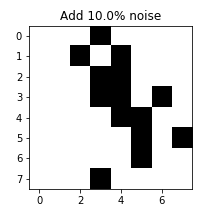

In [58]:
plt.figure('Noisy image',figsize=(image_size,image_size))
plt.clf()

<IPython.core.display.Javascript object>


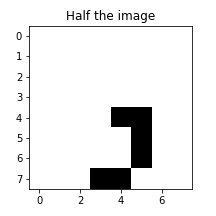

In [59]:
plt.figure('Half image',figsize=(image_size,image_size))
plt.clf()

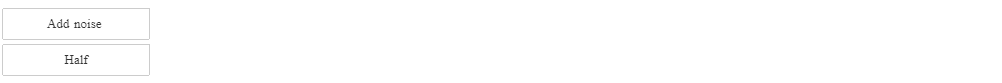

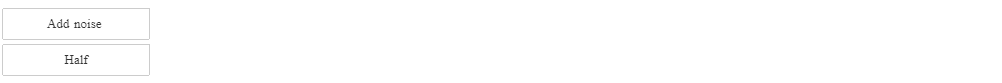

In [76]:
BTN_noise = widgets.Button(description="Add noise")
display(BTN_noise)

BTN_half = widgets.Button(description="Half")
display(BTN_half)

def on_BTN_noise_clicked(b):
    plt.figure('Noisy image')
    plt.clf()
    plt.imshow(addnoise(binarize(digits.images[int(index.value)]),percent.value),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Add "+str(percent.value)+"% noise")

def on_BTN_half_clicked(b):
    plt.figure('Half image')
    plt.clf()
    plt.imshow(half(binarize(digits.images[int(index.value)])),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Half the image")   
    
BTN_noise.on_click(on_BTN_noise_clicked)
BTN_half.on_click(on_BTN_half_clicked)

### 4 Select the image to be reconstructed

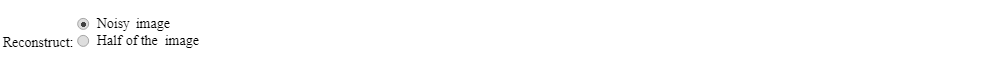

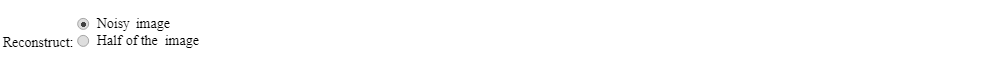

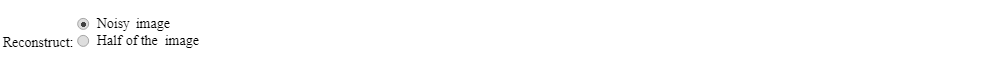

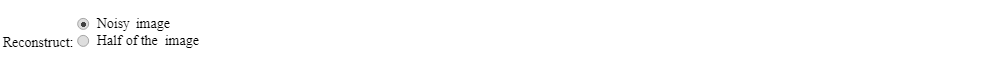

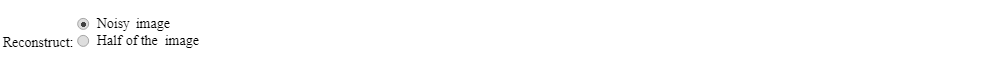

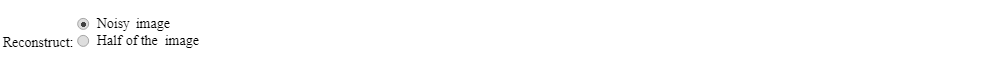

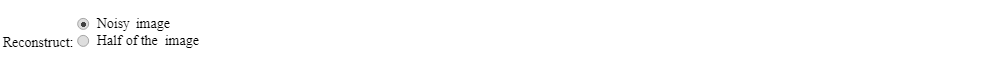

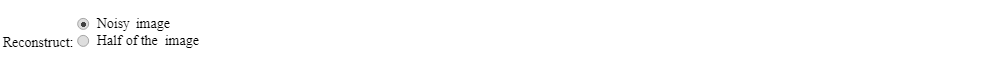

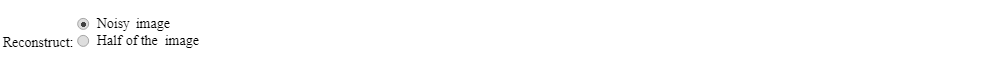

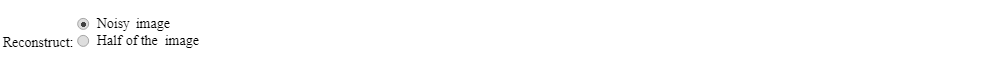

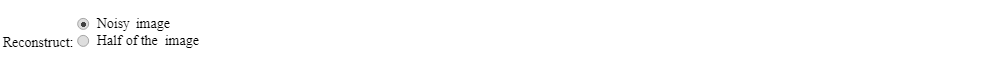

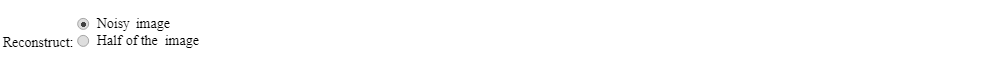

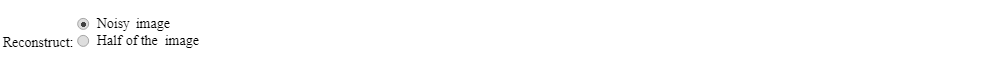

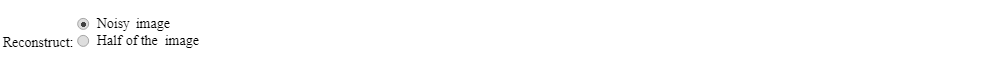

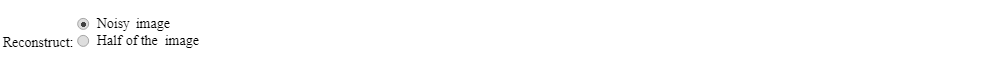

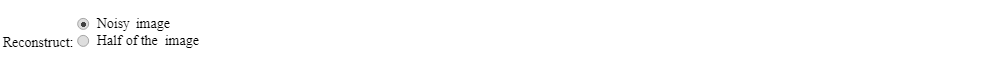

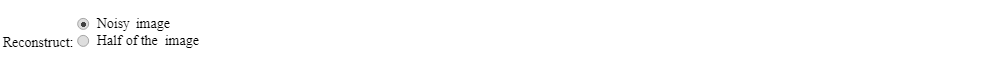

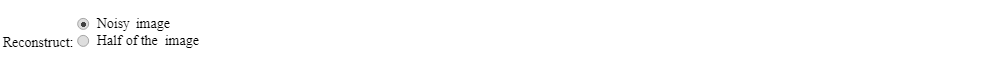

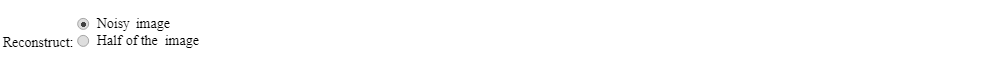

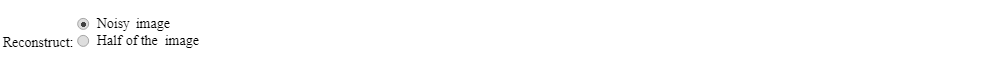

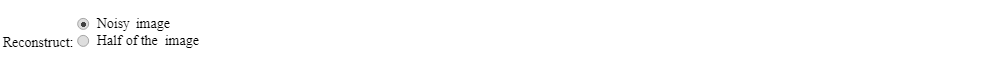

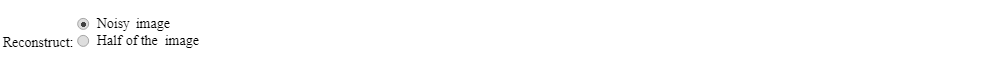

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [25]:
select = widgets.RadioButtons(
    description='Reconstruct:',
    options=['Noisy image', 'Half of the image'],
)

display(select)

### 7 Show the reconstruced image

<IPython.core.display.Javascript object>


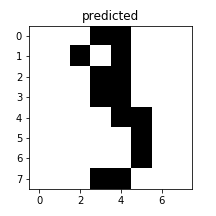

In [60]:
plt.figure('Predicted image',figsize=(image_size,image_size))
plt.clf()

In [27]:
def predict(image):
    global data
    row,col = image.shape
    image = image.reshape(-1)
    dhnet = HopfieldNetwork()
    dhnet.train(data)
    result = dhnet.predict(image)
    result =result.reshape((row,col))
    plt.figure('Predicted image',figsize=(5,5))
    plt.clf()
    plt.imshow(result,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('predicted')



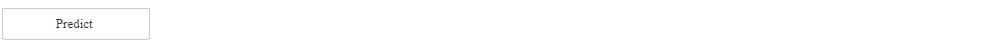

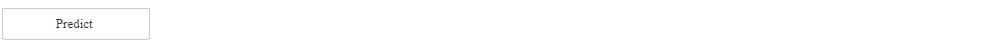

In [77]:
BTN_predict = widgets.Button(description="Predict")
display(BTN_predict)



def on_BTN_predict_clicked(b):
    if select.value == 'Noisy image':
        predict(addnoise(binarize(digits.images[int(index.value)]),percent.value))
    elif select.value == 'Half of the image':
        predict(half(binarize(digits.images[int(index.value)])))
    
BTN_predict.on_click(on_BTN_predict_clicked)